### VERY Important  : XOR

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility  

* Hyperparameters

In [0]:
learning_rate = 0.1
nb_epoch = 10000 #nb는 nunber. 학습을 만번 해보자는거.

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32) 
y_data = np.array(y_data, dtype=np.float32)

In [0]:
X = tf.placeholder(tf.float32, [None, 2]) #엑스가 1아니면 0 2개 들어가잖아요. 두개가 들어가서 하나가 나온다.
Y = tf.placeholder(tf.float32, [None, 1])

#베리어블이 결국 우리가 알고 싶은 것들. 우리는 w1, b1, w2, b2를 학습했다.?? 텐서플로우플레이 그라운드에서의 선의 두께에 해당. 구하는 것을 선언할 때 tf.Variable사용.
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') # W1은 입력 2개, 히든 2개 #만약에 히든 3개 하려면 [2, 3] #랜덤노멀???
b1 = tf.Variable(tf.random_normal([2]), name='bias1') #바이어스 2개
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2') # W2는 2개가 들어가서 1개가 나온다. #만약에 히든 3개 하려면 [3, 1]. w1에서 히든 3개 였으니까. 
b2 = tf.Variable(tf.random_normal([1]), name='bias2') #바이어스 1개. w2에서 [2, 1]니까 1.
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2) #mul이 곱한다는 뜻. #시그모이드는 1과 0사이로 가둔다. 100이 들어오면 1이된다. -1000이 들어오면 0이된다. #데이터를 0과 1로 나누는 문제를 풀 때 좋다.

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y)) #가설에서 정답을 빼고 제곱해서 평균을 낸다.
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) 
#옵티마이저한테 위의 코스트를 줄이도록한다. #train이라는 함수를 만든다. #GradientDescentOptimizer 이 한줄로 수학적인 코딩이 날아가는 거다. 옵티마이저에게 고마워 해야한다. 보면 미분이든 수식 등등 안쓰는데, 다 텐서플로우가 편하게 해주는거다.

In [0]:
# Launch graph
sess = tf.Session() #모든건 세션위에서 다 하고, 세션부터 공급할 거 공급한다.

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [135]:
vstep = []
vcost = []

for i in range(nb_epoch+1): #몇번 돌릴지 nb_epoch
    sess.run(train, feed_dict={X: x_data, Y: y_data}) #트레인을 먹여준다(feed). 뭘 먹여주냐면 엑스는 엑스데이터, 와이는 와이데이터. 데이터 공급은 세션에서 에포크가 돌때 공급됨.

    if i % 1000 ==0: #바로 직전까지만 해도 되는데, 눈으로 보기위해 악세서리로 넣음.
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data}) #코스트를 찍는데, 코스트도 feed를 해주고 출력한다. 천번마다 출력한다. #결과보면, 코스트가 점점 줄어든다. 
        print('step={} / cost={}'.format(i, c1))
        vstep.append(i)
        vcost.append(c1)
        

step=0 / cost=0.30544182658195496
step=1000 / cost=0.2510456442832947
step=2000 / cost=0.2501783072948456
step=3000 / cost=0.24968695640563965
step=4000 / cost=0.24883615970611572
step=5000 / cost=0.24662882089614868
step=6000 / cost=0.24077501893043518
step=7000 / cost=0.2259557843208313
step=8000 / cost=0.20062844455242157
step=9000 / cost=0.17635396122932434
step=10000 / cost=0.15907993912696838


Text(0.5, 1.0, 'Cost')

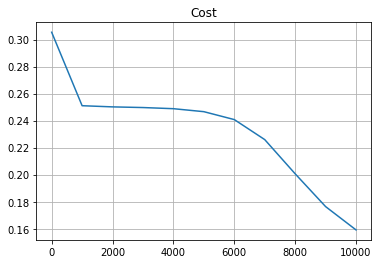

In [136]:
plt.plot(vstep, vcost)
plt.grid()
plt.title('Cost')

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

### Check the results

결과를 체크하는 것도 중요하다

In [137]:
print(W1)

<tf.Variable 'weight1_7:0' shape=(2, 2) dtype=float32_ref>


In [138]:
print(sess.run(W1))

[[ 1.510978   3.4982562]
 [-3.0589046  4.184576 ]]


In [139]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1) #여기의 w1은 학습이 된 w1. 만번의 학습 #
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2) #여기 w2도 마찬가지.
    l2cast = tf.cast(l2 > 0.5, dtype=tf.float32) #기준을 0.5로 잡아서
    #print( i, sess.run(l2))
    print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :]) #결과에서 세번째에 나오는 거는, 마지막은 정답 
    #결과를 보면, 첫번째 네번째가 0에 가깝게 나온다. 가운데 두개는 1에 가깝게 나와서 학습이 제대로 된 것을 확인하였다.

0 [[0.18612157]] [[0.]] [[0.]]
1 [[0.51688]] [[1.]] [[1.]]
2 [[0.77576035]] [[1.]] [[1.]]
3 [[0.5639062]] [[1.]] [[0.]]


### 참고 : Sigmoid

In [140]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [141]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [142]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

[4.53978687e-05 7.48462275e-05 1.23394576e-04 2.03426978e-04
 3.35350130e-04 5.52778637e-04 9.11051194e-04 1.50118226e-03
 2.47262316e-03 4.07013772e-03 6.69285092e-03 1.09869426e-02
 1.79862100e-02 2.93122308e-02 4.74258732e-02 7.58581800e-02
 1.19202922e-01 1.82425524e-01 2.68941421e-01 3.77540669e-01
 5.00000000e-01 6.22459331e-01 7.31058579e-01 8.17574476e-01
 8.80797078e-01 9.24141820e-01 9.52574127e-01 9.70687769e-01
 9.82013790e-01 9.89013057e-01 9.93307149e-01 9.95929862e-01
 9.97527377e-01 9.98498818e-01 9.99088949e-01 9.99447221e-01
 9.99664650e-01 9.99796573e-01 9.99876605e-01 9.99925154e-01]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sigmoid')

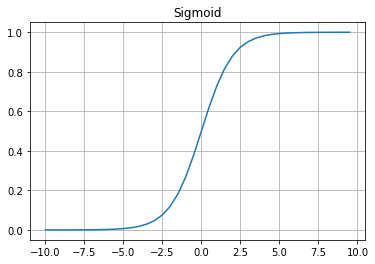

In [144]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid')